Random code, ignore this

In [1]:
import numpy as np
import pandas as pd

In [2]:
from fxvol.strategy import get_pred, run_strategy

In [3]:
from fxvol.data_utils import load_csv, save_csv, make_xy

In [ ]:
log_rets = load_csv("processed", "log_returns").dropna()
CURRENCIES = ["AUD", "CHF", "EUR", "GBP", "JPY"]

In [68]:
res = load_csv('results/strategy', 'gb_tree')

In [69]:
np.sqrt(252/5) * np.std(res)

0.10186200907637499

In [5]:
HORIZON = 5
FEATURE_KWARGS = {"lags": [1, 5, 22, 66], "vol_vol": 22}

In [6]:
DATA = [(curr,) + make_xy(log_ret=log_rets[curr], horizon=HORIZON, **FEATURE_KWARGS) for curr in CURRENCIES]

In [50]:
from fxvol.baseline_models import naive_fc, ewma_fc, har_fc
from fxvol.ML_models import ols_fc

In [51]:
MODEL = (har_fc, "har", {"lags": [1, 5, 22, 66]})

In [52]:
pf_log_ret = run_strategy(DATA, MODEL, HORIZON, 0.1)

In [53]:
np.sqrt(252/HORIZON) * np.std(pf_log_ret)

0.10676367624158038

In [9]:
preds = get_pred(DATA, MODEL, HORIZON)

In [12]:
preds.head(6)

,AUD,CHF,EUR,GBP,JPY
Date,,,,,
2018-02-14,0.005042,0.005532,0.004588,0.005198,0.005500
2018-02-21,0.005160,0.005575,0.004882,0.005424,0.005683
2018-02-28,0.005472,0.005267,0.004738,0.005035,0.005259
2018-03-07,0.004622,0.005279,0.004628,0.005414,0.005701
2018-03-14,0.004948,0.005531,0.004878,0.004914,0.005432
2018-03-21,0.005142,0.004921,0.004938,0.004514,0.004935


In [14]:
log_rets = pd.DataFrame({curr: X["lr"] for curr, X, _ in DATA})
log_rets = log_rets.loc[preds.index[0] :]
log_rets.head(6)

,AUD,CHF,EUR,GBP,JPY
Date,,,,,
2018-02-14,0.000236,-0.003490,0.004056,0.002497,-0.008556
2018-02-15,0.008526,-0.008310,0.009146,0.009236,-0.010982
2018-02-16,0.001952,-0.005937,0.002909,0.006285,-0.004476
2018-02-19,-0.004012,0.005635,-0.007362,-0.005163,0.001413
2018-02-20,-0.000396,0.002359,-0.001067,-0.002774,0.004207
2018-02-21,-0.003545,0.007503,-0.005120,0.000602,0.006278


In [16]:
8526+1952-4012-396-3545

2525

In [15]:
period_log_rets = log_rets.rolling(HORIZON).sum()
period_log_rets.head(6)

,AUD,CHF,EUR,GBP,JPY
Date,,,,,
2018-02-14,NaN,NaN,NaN,NaN,NaN
2018-02-15,NaN,NaN,NaN,NaN,NaN
2018-02-16,NaN,NaN,NaN,NaN,NaN
2018-02-19,NaN,NaN,NaN,NaN,NaN
2018-02-20,0.006307,-0.009744,0.007682,0.010080,-0.018394
2018-02-21,0.002526,0.001250,-0.001494,0.008185,-0.003560


In [17]:
preds = preds.shift(1).iloc[1:]
preds

,AUD,CHF,EUR,GBP,JPY
Date,,,,,
2018-02-21,0.005042,0.005532,0.004588,0.005198,0.005500
2018-02-28,0.005160,0.005575,0.004882,0.005424,0.005683
2018-03-07,0.005472,0.005267,0.004738,0.005035,0.005259
2018-03-14,0.004622,0.005279,0.004628,0.005414,0.005701
2018-03-21,0.004948,0.005531,0.004878,0.004914,0.005432
...,...,...,...,...,...
2025-11-11,0.004171,0.004182,0.003703,0.003673,0.005442
2025-11-18,0.004399,0.004241,0.003626,0.004238,0.005165
2025-11-25,0.004258,0.004147,0.003447,0.003492,0.004456


In [18]:
period_log_rets = period_log_rets.loc[preds.index]
period_log_rets

,AUD,CHF,EUR,GBP,JPY
Date,,,,,
2018-02-21,0.002526,0.001250,-0.001494,0.008185,-0.003560
2018-02-28,-0.011136,0.003156,-0.008549,-0.006809,0.000419
2018-03-07,-0.000935,-0.001193,0.015120,-0.000431,-0.017741
2018-03-14,0.009160,0.005389,-0.001960,0.005184,0.009159
2018-03-21,-0.021541,0.013300,-0.011398,0.002322,-0.000366
...,...,...,...,...,...
2025-11-11,-0.000948,-0.003682,0.003300,0.002868,-0.000376
2025-11-18,-0.006475,-0.011140,0.002882,-0.001277,0.007285
2025-11-25,-0.004152,0.015416,-0.006101,-0.003808,0.010672


In [22]:
TARGET_VOL = 0.01
weights = TARGET_VOL / (preds * np.sqrt(252 * len(CURRENCIES)))
weights

,AUD,CHF,EUR,GBP,JPY
Date,,,,,
2018-02-21,0.055876,0.050927,0.061398,0.054194,0.051225
2018-02-28,0.054596,0.050529,0.057711,0.051936,0.049576
2018-03-07,0.051484,0.053484,0.059459,0.055952,0.053570
2018-03-14,0.060952,0.053365,0.060871,0.052039,0.049417
2018-03-21,0.056939,0.050935,0.057752,0.057331,0.051859
...,...,...,...,...,...
2025-11-11,0.067538,0.067359,0.076074,0.076693,0.051769
2025-11-18,0.064044,0.066423,0.077691,0.066475,0.054547
2025-11-25,0.066162,0.067928,0.081739,0.080671,0.063221


In [28]:
pf_log_ret = np.log(1 + (weights * (np.exp(period_log_rets) - 1)).sum(axis=1))
pf_log_ret

Date
2018-02-21    0.000377
2018-02-28   -0.001269
2018-03-07   -0.000172
2018-03-14    0.001454
2018-03-21   -0.001072
                ...   
2025-11-11    0.000141
2025-11-18   -0.000611
2025-11-25    0.000655
2025-12-02    0.001221
2025-12-09    0.002048
Length: 407, dtype: float64

<Axes: xlabel='Date'>

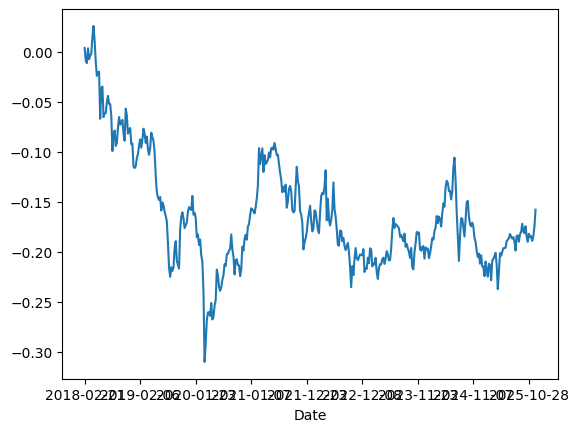

In [55]:
pf_ret = np.exp(pf_log_ret.cumsum()) - 1
pf_ret.plot()

In [56]:
mu = 252/HORIZON * pf_ret.iloc[-1]/len(pf_ret)
mu

-0.019564027288188346

In [57]:
sig = np.sqrt(252/HORIZON) * np.std(pf_log_ret)
sig

0.10676367624158038

In [58]:
mu/sig

-0.18324609995556618